# Segmentation client : Online Retail Dataset (UK, 2010–2011)

# Objectif

L'objectif est d'identifier des classes de consommateurs à partir des transactions, pour adapter des stratégies marketing.

On veut identifier 3 classes de consommateurs pour proposer des offres adaptées.

Le dataset est disponible [ici](https://archive.ics.uci.edu/dataset/352/online%2Bretail?)

### Informations générales
- **Type de données** : multivariées, séquentielles, séries temporelles  
- **Période** : 01/12/2010 → 09/12/2011  
- **Contexte** : Transactions d’un e-commerce britannique spécialisé dans les cadeaux  
- **Clients** : Particuliers et grossistes  
- **Nombre d’instances** : 541 909  
- **Nombre de variables** : 8 (dont ID, numériques et catégorielles)  
- **Valeurs manquantes** : Oui (notamment CustomerID).  

### Variables
| Variable      | Type          | Description                                                       |
|---------------|--------------|-------------------------------------------------------------------|
| **InvoiceNo** | Catégorielle | Identifiant unique de la transaction (6 chiffres). Préfixe "C" = annulation |
| **StockCode** | Catégorielle | Identifiant unique du produit (5 chiffres)                        |
| **Description** | Catégorielle | Nom du produit                                                   |
| **Quantity**  | Entier       | Quantité d’articles achetés (par transaction)                     |
| **InvoiceDate** | Date       | Date et heure de la transaction                                   |
| **UnitPrice** | Réel         | Prix unitaire (£)                                                 |
| **CustomerID** | Catégorielle | Identifiant unique du client (5 chiffres)                        |
| **Country**   | Catégorielle | Pays du client                                                    |

# Chargement & aperçu des données
- Le dataset contient des transactions entre **2010-12-01** et **2011-12-09**.
- Colonnes clés : `InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country`.
- On garde **uniquement** les lignes exploitables (pas d’annulations, quantités/prix strictement positifs, clients identifiés).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data = pd.read_excel('Online Retail.xlsx')

In [56]:
df = data.copy()

In [57]:
# Typage
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], dayfirst=True, errors="coerce")

In [58]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [59]:
df.shape

(541909, 8)

## Nettoyage des données

### Exclure les valeurs manquantes

In [60]:
# Exclure les lignes avec des valeurs manquantes
df.dropna(inplace=True)

In [61]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Exclure les valeurs aberrantes (prix et quantités négatifs)

In [62]:
# Exclure les prix et quantités négatifs
df = df[df["UnitPrice"] > 0]
df = df[df["Quantity"] > 0]

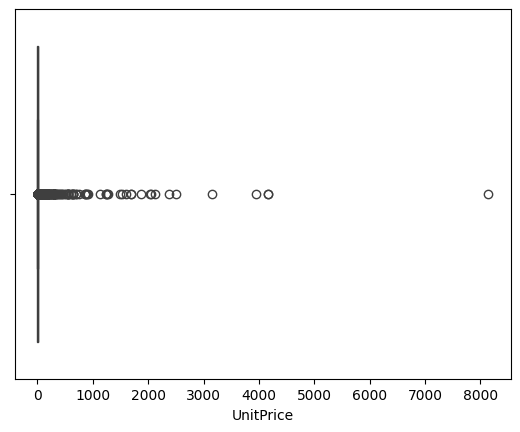

In [63]:
sns.boxplot(x=df["UnitPrice"]);

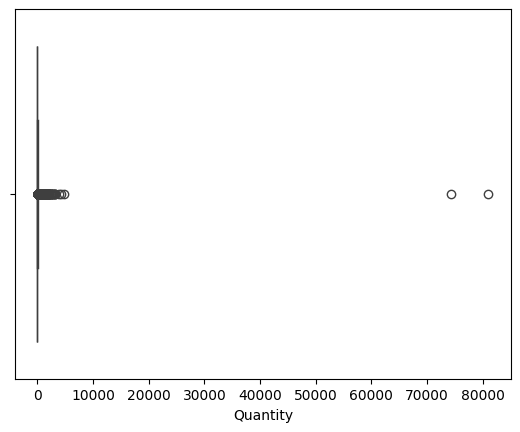

In [64]:
sns.boxplot(x=df["Quantity"]);

### Exclure les duplicats

In [65]:
# Exclure les duplicats
df.drop_duplicates(inplace=True)

In [66]:
# Convertir la colonne Invoice No en chaîne de caractères
df["InvoiceNo"] = df["InvoiceNo"].astype(str)

# Exclure les Invoice No qui commencent par "C" (annulations)
df = df[~df["InvoiceNo"].str.startswith("C")]

# Convertir la colonne Invoice No en entier
df["InvoiceNo"] = df["InvoiceNo"].astype(int)

In [67]:
df.shape

(392692, 8)

## Exploratory Data Analysis

### Analyse univariée

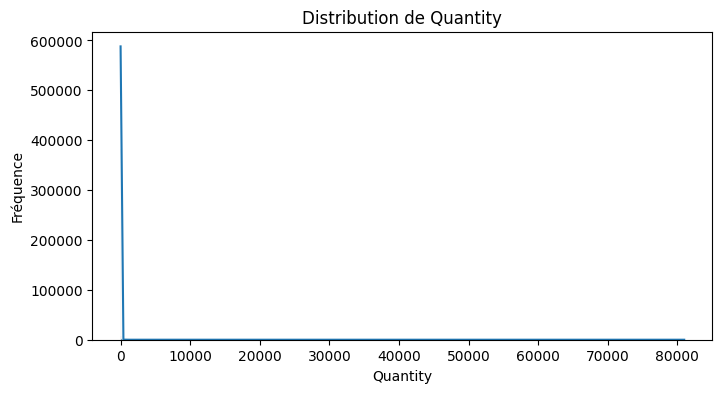

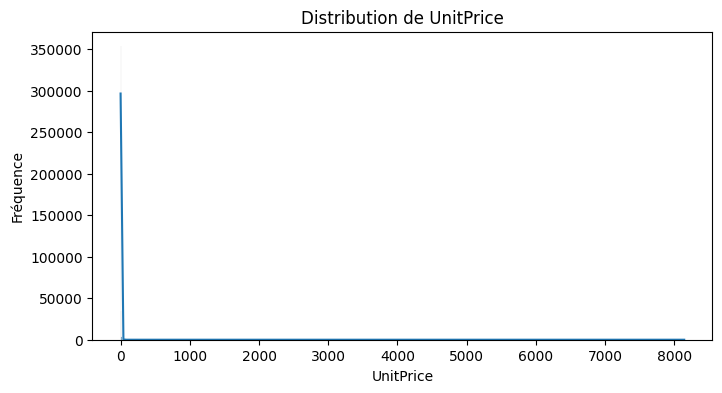

In [68]:
continuous_cols = ['Quantity', 'UnitPrice']
for col in continuous_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show();

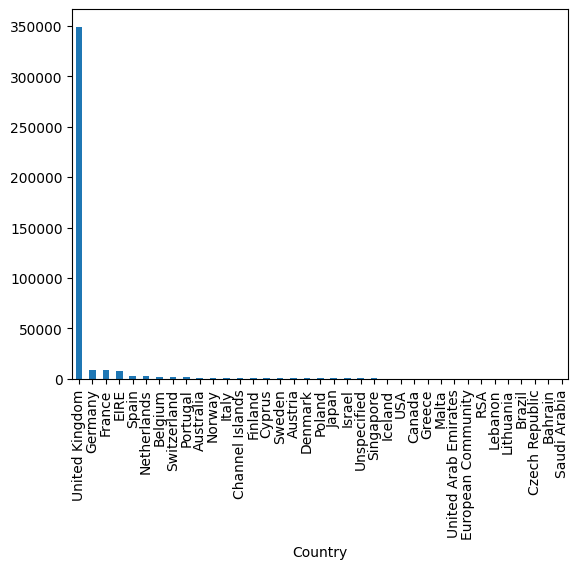

In [69]:
df['Country'].value_counts().plot(kind='bar');

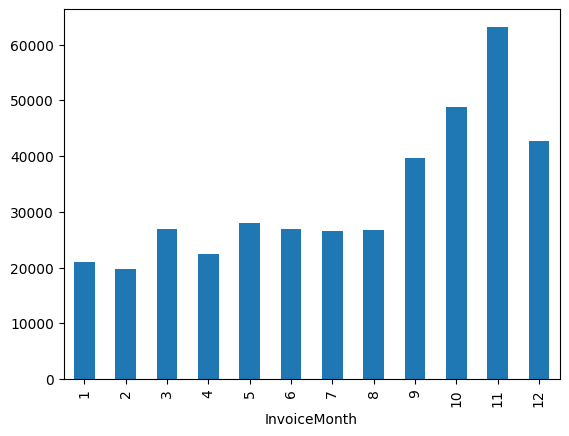

In [70]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceMonth'].value_counts().sort_index().plot(kind='bar');

### Analyse multivariée

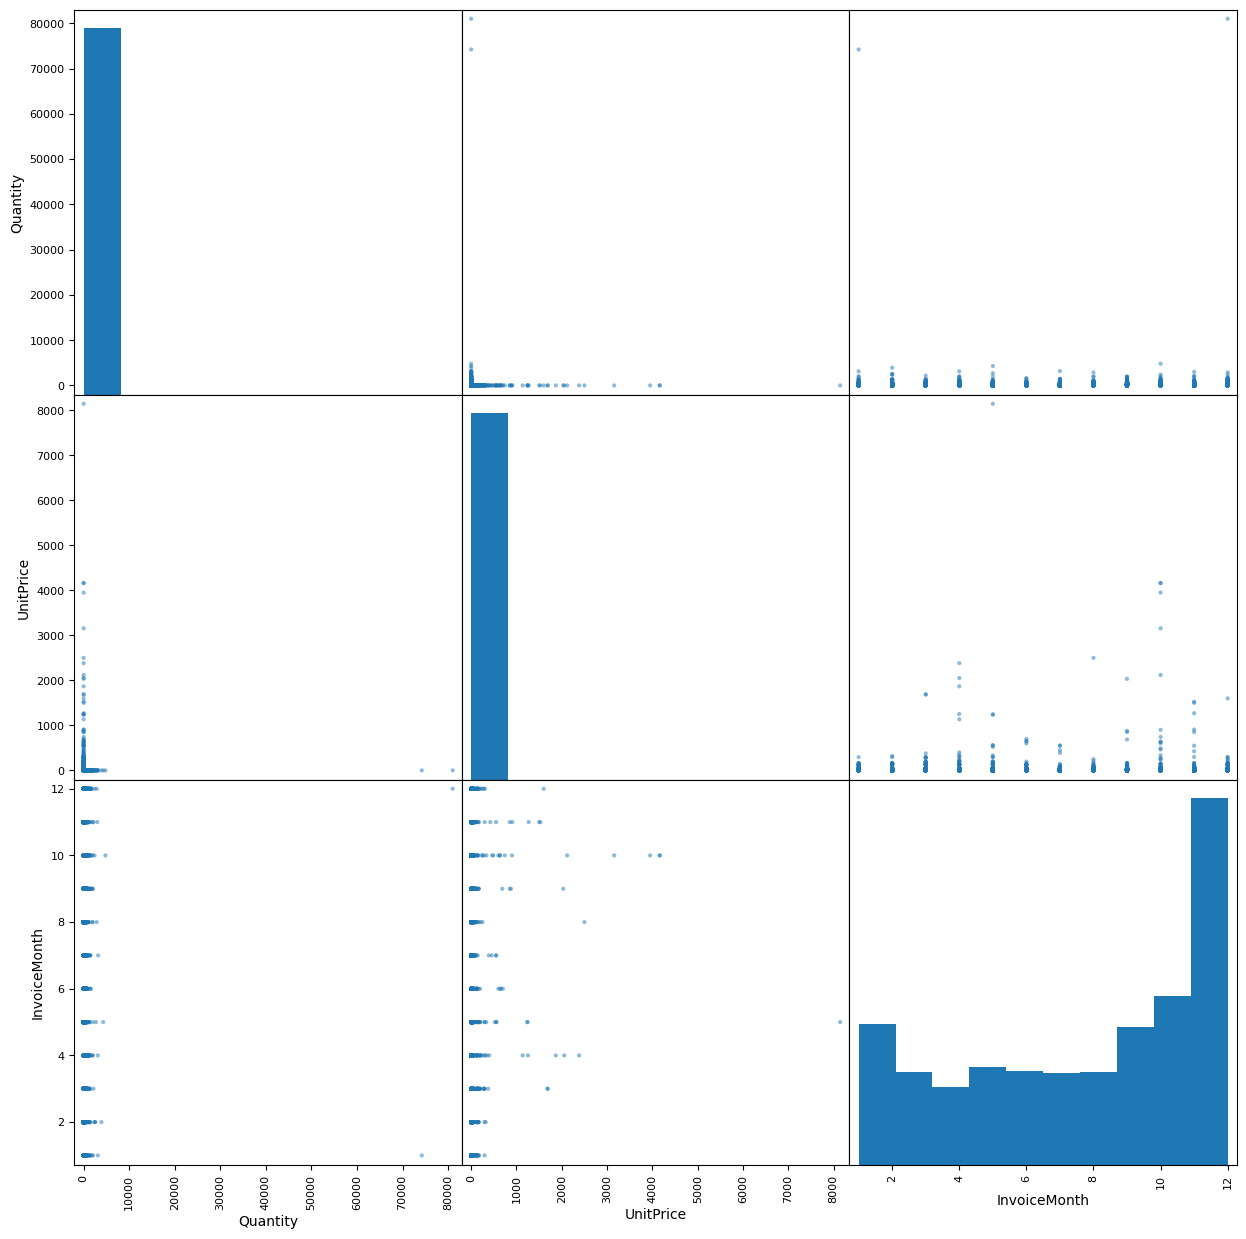

In [71]:
cols_to_be_analyzed = ['Quantity', 'UnitPrice', 'InvoiceMonth']
pd.plotting.scatter_matrix(df[cols_to_be_analyzed], figsize=(15,15));

# Feature Engineering

- **Montant** : somme (`Quantity * UnitPrice`) par client.  
- **Frequence** : nombre de **factures distinctes** par client.  
- **Recence** : nombre de jours depuis la **dernière commande** du client jusqu’à une date de référence $D_\text{ref}$.
- On choisit $D_\text{ref} = \max(\text{InvoiceDate}) + 1 \text{ jour}$ (fiable et indépendant d’un split train/test).

In [74]:
from datetime import timedelta

ref_date = df['InvoiceDate'].max() + timedelta(days=1)

In [75]:
df['LineAmount'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Montant,Frequence,LineAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,34,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,34,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,34,20.34


In [102]:
rfm = df.groupby('CustomerID').agg(
    Montant=('LineAmount', 'sum'),
    Frequence=('InvoiceNo', 'nunique'),
    LastPurchase=('InvoiceDate', 'max'),
).reset_index()

In [103]:
rfm['Recence'] = (ref_date - rfm['LastPurchase']).dt.days

In [104]:
rfm.head()

,CustomerID,Montant,Frequence,LastPurchase,Recence
0,12346.0,77183.60,1,2011-01-18 10:01:00,326
1,12347.0,4310.00,7,2011-12-07 15:52:00,2
2,12348.0,1797.24,4,2011-09-25 13:13:00,75
3,12349.0,1757.55,1,2011-11-21 09:51:00,19
4,12350.0,334.40,1,2011-02-02 16:01:00,310


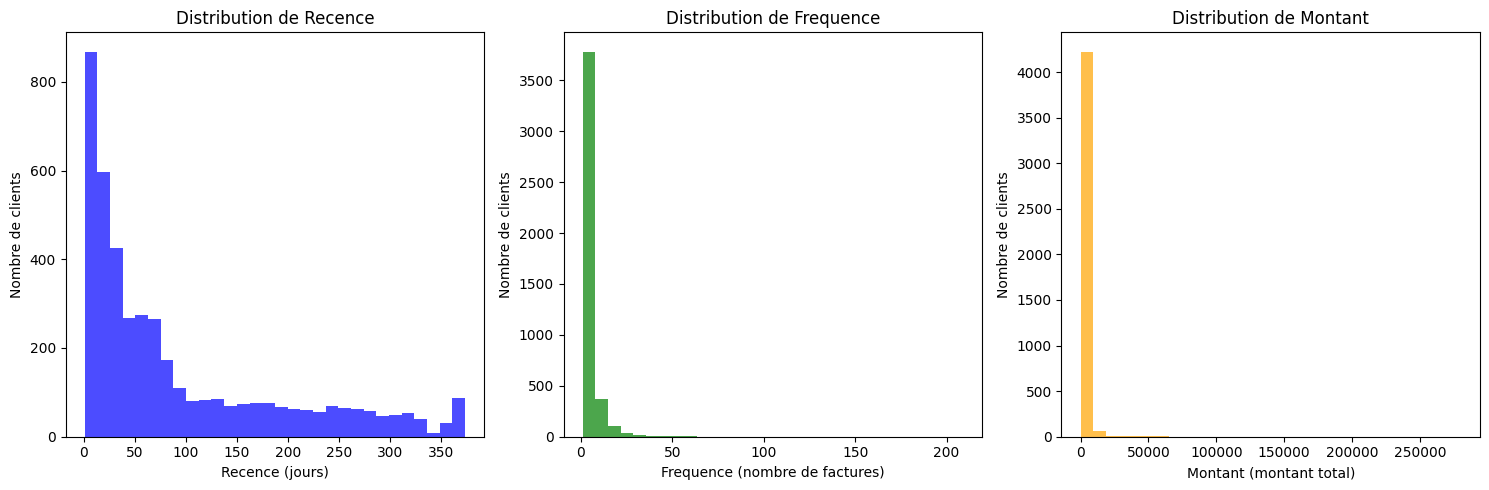

In [105]:
# Dessiner les distrbution de rfm pour voir s'il faut utiliser une transformation
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(rfm["Recence"], bins=30, color='blue', alpha=0.7)
axes[0].set_title('Distribution de Recence')
axes[0].set_xlabel('Recence (jours)')
axes[0].set_ylabel('Nombre de clients')

axes[1].hist(rfm["Frequence"], bins=30, color='green', alpha=0.7)
axes[1].set_title('Distribution de Frequence')
axes[1].set_xlabel('Frequence (nombre de factures)')
axes[1].set_ylabel('Nombre de clients')     

axes[2].hist(rfm["Montant"], bins=30, color='orange', alpha=0.7)
axes[2].set_title('Distribution de Montant')
axes[2].set_xlabel('Montant (montant total)')
axes[2].set_ylabel('Nombre de clients')
plt.tight_layout()
plt.show()

Les distributions sont **asymétriques** (queue lourde) donc on va appliquer un **log1p** (log(1+x)).

# Prétraitement des variables

En plus de l'application de **log1p**, comme KMeans est sensible à l’échelle on va appliquer une **standardisation** (moyenne 0, variance 1).

In [106]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [107]:
rfm_log = rfm.copy()
for col in ['Recence', 'Frequence', 'Montant']:
    rfm_log[col] =  np.log1p(rfm_log[col])

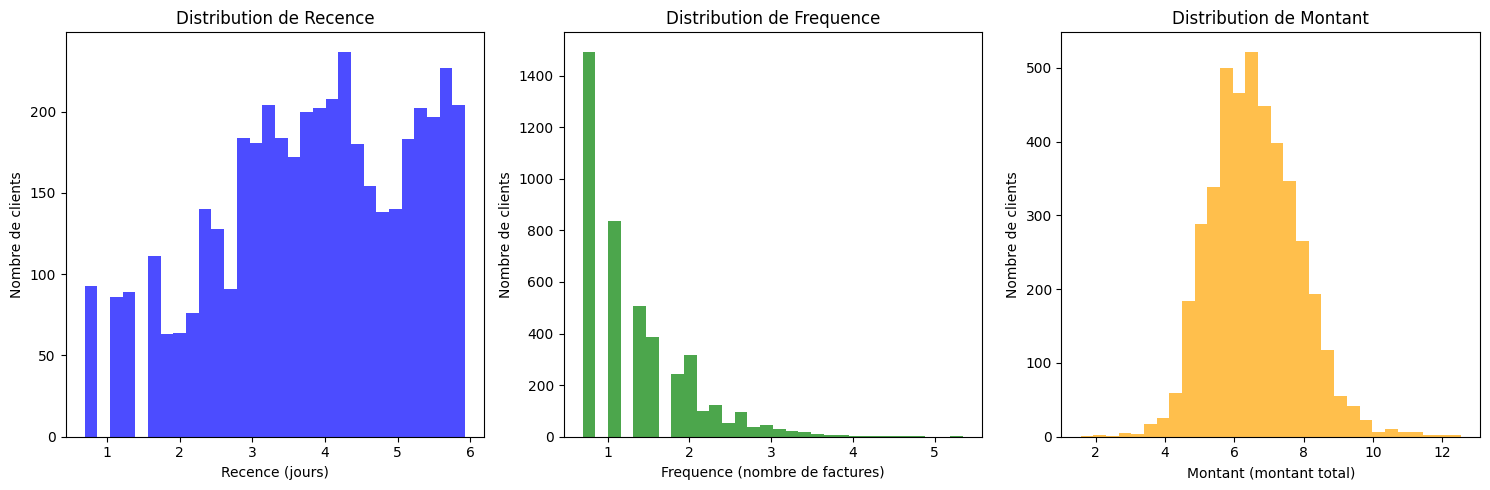

In [108]:
# Dessiner les distrbution de rfm_log
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(rfm_log["Recence"], bins=30, color='blue', alpha=0.7)
axes[0].set_title('Distribution de Recence')
axes[0].set_xlabel('Recence (jours)')
axes[0].set_ylabel('Nombre de clients')

axes[1].hist(rfm_log["Frequence"], bins=30, color='green', alpha=0.7)
axes[1].set_title('Distribution de Frequence')
axes[1].set_xlabel('Frequence (nombre de factures)')
axes[1].set_ylabel('Nombre de clients')     

axes[2].hist(rfm_log["Montant"], bins=30, color='orange', alpha=0.7)
axes[2].set_title('Distribution de Montant')
axes[2].set_xlabel('Montant (montant total)')
axes[2].set_ylabel('Nombre de clients')
plt.tight_layout()
plt.show()

In [109]:
scaler = StandardScaler()

X = scaler.fit_transform(rfm_log[['Recence', 'Frequence', 'Montant']])

X[:5]

array([[ 1.46199281, -0.95521426,  3.7077163 ],
       [-2.03873442,  1.07442519,  1.41490344],
       [ 0.37310424,  0.38630445,  0.72002428],
       [-0.62308592, -0.95521426,  0.70228691],
       [ 1.42455753, -0.95521426, -0.61451388]])

# Choix du nombre de clusters

Ici, nous avons des **contraintes business**, on veut identifier 3 classes de consommateurs, donc on fixe $K=3$.
Si nous n'avions pas cette contrainte, nous aurions pu utiliser la méthode du coude (Elbow Method) ou la silhouette pour choisir le nombre optimal de clusters.

# Entraînement KMeans

On entraîne KMeans, puis on **profite des centroïdes** (dans l’espace standardisé/log) pour interpréter les profils.

In [110]:
from sklearn.cluster import KMeans

K_value = 3
kmeans = KMeans(n_clusters=K_value, random_state=42)
labels = kmeans.fit_predict(X)

rfm['Cluster'] = labels
rfm.head()

,CustomerID,Montant,Frequence,LastPurchase,Recence,Cluster
0,12346.0,77183.60,1,2011-01-18 10:01:00,326,2
1,12347.0,4310.00,7,2011-12-07 15:52:00,2,1
2,12348.0,1797.24,4,2011-09-25 13:13:00,75,2
3,12349.0,1757.55,1,2011-11-21 09:51:00,19,2
4,12350.0,334.40,1,2011-02-02 16:01:00,310,0


# Profiling des clusters
- **Centroïdes** (dans l’espace transformé) alors on **inverse** les étapes (inverse-standardisation + expm1) pour revenir à l’échelle RFM d’origine.
- **KPIs par cluster** : taille, valeurs moyennes/médianes, part du CA.

In [111]:
# Centroïdes dans l'espace log-standardisé -> on inverse
centroids_std = kmeans.cluster_centers_
centroids_log = scaler.inverse_transform(centroids_std)

centroids = pd.DataFrame(centroids_log, columns=['Recence', 'Frequence', 'Montant'])
for col in centroids.columns:
    centroids[col] = np.expm1(centroids[col])

centroids['Cluster'] = range(K_value)
centroids = centroids.set_index("Cluster")

centroids.head()

,Recence,Frequence,Montant
Cluster,,,
0,128.090227,1.282413,272.229299
1,9.207894,10.619155,4230.373142
2,28.674126,3.093340,948.011427


In [112]:
# KPIs par cluster
cluster_stats = rfm.groupby("Cluster").agg(
    n_clients=("CustomerID", "count"),
    Recence_median=("Recence", "median"),
    Frequence_median=("Frequence", "median"),
    Montant_median=("Montant", "median"),
    Montant_sum=("Montant", "sum"),
).sort_values("Montant_sum", ascending=False)

total_Montant = cluster_stats["Montant_sum"].sum()
cluster_stats["Part_du_CA_%"] = cluster_stats['Montant_sum'] / total_Montant * 100

In [113]:
print("\n=== Centroïdes (échelle RFM originale) ===")
display(centroids.round(2))

print("\n=== KPIs par cluster ===")
display(cluster_stats.round(2))


=== Centroïdes (échelle RFM originale) ===


,Recence,Frequence,Montant
Cluster,,,
0,128.09,1.28,272.23
1,9.21,10.62,4230.37
2,28.67,3.09,948.01



=== KPIs par cluster ===


,n_clients,Recence_median,Frequence_median,Montant_median,Montant_sum,Part_du_CA_%
Cluster,,,,,,
1,775,9.0,10.0,3692.28,6090749.62,68.53
2,1694,30.0,3.0,968.81,2122833.79,23.89
0,1869,159.0,1.0,295.00,673625.48,7.58


# Interprétation marketing des 3 clusters

**Attention, il se peut que le numéro des clusters change (0, 1, 2) selon l'initialisation de KMeans.**

Le **cluster 1** correspond aux **clients les plus précieux** : 
- Ils ont acheté très récemment (Recence ≈ 9 jours), 
- Commandent très souvent (Frequence ≈ 10)
- Dépensent beaucoup (Montant ≈ 3 708 £). 
  
Bien qu’ils ne représentent qu’environ **770** clients, ils génèrent plus de **68 %** du chiffre d’affaires. Ce sont les **VIP hyper-actifs**. La stratégie doit viser à les fidéliser au maximum : accès anticipé aux nouveautés, bundles premium, programmes de fidélité exclusifs, offres personnalisées et suivi rapproché pour éviter toute attrition.

---

Le **cluster 2** regroupe le **cœur de clientèle** : 
- Des clients encore assez récents (Recence ≈ 30 jours)
- Une fréquence modérée (≈ 3 commandes)
- Une dépense moyenne (≈ 979 £). 

Ils sont près de **1 700** et contribuent à environ **24 %** du chiffre d’affaires. Ce segment est stratégique pour consolider la base : actions de nurturing, recommandations personnalisées, incitations à la récurrence (par exemple via le free shipping au-dessus d’un certain seuil), et campagnes ciblées pour transformer ces clients en réguliers.

---

Le **cluster 0** rassemble les **clients les moins engagés** : 
- Achats anciens (Recence ≈ 158 jours)
- Très peu fréquents (≈ 1 commande)
- Dépense faible (≈ 298 £). 

C’est pourtant le segment le plus large (≈ 1 872 clients), mais il ne génère que **7,6 %** du chiffre d’affaires. Ce sont les **clients dormants ou occasionnels**. Les efforts doivent être calibrés : campagnes de réactivation (offres limitées dans le temps, emails “we miss you”), mise en avant des best-sellers, rappels saisonniers. L’investissement marketing doit rester contrôlé pour éviter un coût d’acquisition supérieur à la valeur récupérée.